<a href="https://colab.research.google.com/github/SreeLakshmi888/PREDICTING-HEART-DISEASE/blob/main/Copy_of_HD_PREDICTION_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING HEART DISEASE FROM CLINICAL AND LABORATORIAL DATA USING KNN**

## **INTRODUCTION**

By the end of this project, you're going to be able to proceed a few basic steps of exploratory data analysis and data pre processing in a structure data set to train a K-Nearest-Neighbors binary classifier to predict the absence and the presence of heart disease in patients from clinical and laboratorial data. And to evaluate your model using the best suited metrics
for the task.

**Importations:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

**Loading the dataset:**

We are going to read our data set as a Pandas data frame and to vinculate it to the variable data so pd.read_csv, here the name of our file, and I'm going also to run its head so we can take a look at its structure.All right, so here we can see that we have 14 variables
between this 14 variables.One is a target variable, which stands for the outcome of the patients that is presence or absence of heart disease,
and that's the variable that we're going to predict. The other variables are called predictive variables, and they will provide to the model information it will need to make its predictions.Among those variables
we have categorical variables like sex and also distributional variables like age and cholesterol,for instance.

In [ ]:
data = pd.read_csv('heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Shape:

Now let's take a look at the shape of this data set 303 patients and as I said 14 variables.

In [ ]:
data.shape

(303, 14)

Variables types:

And now variables types.And here we can see that they are all integers except for oldpeak.

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## **EDA AND PRE-PROCESSING**




### Outcome variable count:

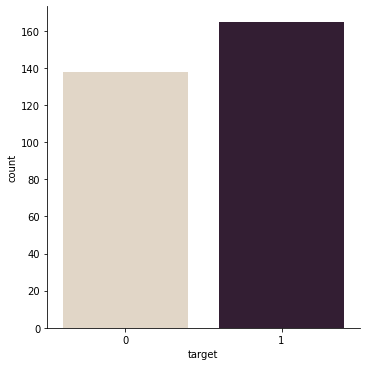

In [ ]:
sns.catplot(x='target', kind='count', palette='ch:.25', data=data)

### Categorical predictive variables:

sex:

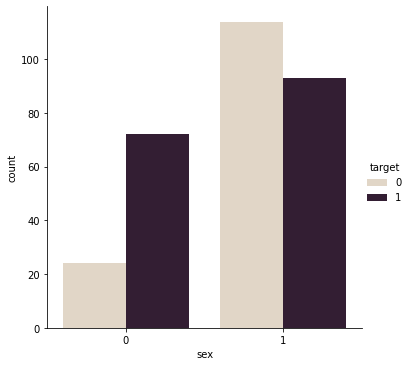

In [ ]:
sns.catplot(x='sex', kind='count', hue='target', data=data, palette='ch:.25')

cp:

fbs:

restecg:

exang:

slope:

ca:

thal:

### Distributional predictive variables:




In [ ]:
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


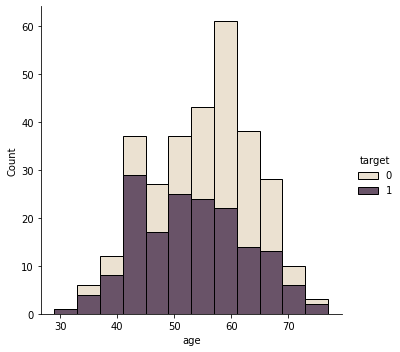

In [ ]:
sns.displot(x='age', multiple='stack', hue='target', data=data, palette='ch:.25')

## **SPLITTING AND PRE-PROCESSING:**

Defining x_train, x_test, y_train and y_test:

In [ ]:
x = data.drop('target', axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

Scaling the data:

In [ ]:
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

## **TRAINING THE MODEL:**

Parameters for grid search:

In [ ]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [3,5,7,9,11], 'weights': ['uniform', 'distance']}

Fiting training data and grid searching:

In [ ]:
grid = GridSearchCV(knn, parameters, cv=4, scoring='accuracy')
grid.fit(x_train, y_train)



GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Displayng best parameters:

In [ ]:
print(grid.best_params_)

{'n_neighbors': 5, 'weights': 'uniform'}


Picking the best model:

In [ ]:
model = grid.best_estimator_

## **EVALUATING THE MODEL:**

Model score on test data:

In [ ]:
model.score(x_test, y_test)

0.9016393442622951

Confusion matrix:

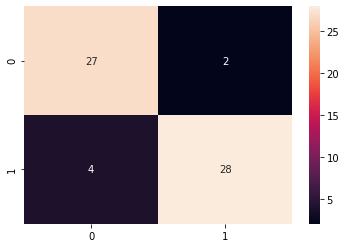

In [ ]:
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm)
sns.heatmap(cm, annot=True)
plt.show()

Calculating sensitivity, specificity, PPV and NPV:

In [ ]:
TP = 28
FP = 2
TN = 27
FN = 4
sensitivity = TP / (TP+FN) *100 
specificity = TN / (TN + FP) * 100
ppv = TP / (TP + FP) * 100
npv = TN / (TN + FN) * 100


Printing sensitivity, specificity, PPV and NPV:

In [ ]:
print('Sensitivity:', sensitivity,'% ','Specificity:', specificity,'% ','positive predictive value:',ppv,'% ','negative predictive value:',npv,'%' )

Sensitivity: 87.5 %  Specificity: 93.10344827586206 %  positive predictive value: 93.33333333333333 %  negative predictive value: 87.09677419354838 %


AUC score:

In [ ]:
probs = model.predict_proba(x_test)[: , 1]
auc = metrics.roc_auc_score(y_test, probs)
print(auc)

0.9154094827586208


ROC curve:

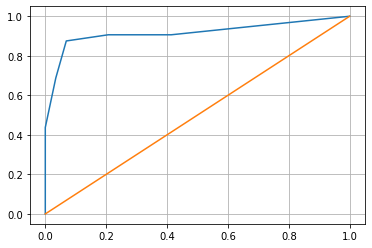

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs)
plt.figure()
plt.grid()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.show()